   **CUSTOMER DATA ANALYSIS PROJECT**

In [48]:
# We had already connected through remote database server by the given credentials, fetched data and converted 
# dataset in the csv form , so that we can work offline as well 


import pandas as pd
df = pd.read_csv("customer_raw_from_db.csv")
import matplotlib.pyplot as plt
df.head()
df.shape


(99457, 10)

In [50]:
#For overall information
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I999994,C299697,Female,NaN,Clothing,NaN,NaN,Cash,24-11-2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


**CHECKING FOR MISSING OR DUPLICATE VALUES**

In [51]:
print("Missing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Duplicate rows: 0


**CREATING A REVENUE COLUMN FOR LATER USES**

In [52]:
df['revenue'] = df['quantity'] * df['price']


In [53]:
df[['quantity', 'price', 'revenue']].head()


,quantity,price,revenue
0,5,1500.40,7502.00
1,5,203.30,1016.50
2,2,600.16,1200.32
3,3,45.45,136.35
4,4,4200.00,16800.00


**CHECHING UNIQUE VALUES FOR DATA CONSISTENCY**

In [55]:
for col in ['gender', 'payment_method', 'category', 'shopping_mall']:
    print(f"\n{col}:")
    print(df[col].value_counts())



gender:
gender
Female    59482
Male      39975
Name: count, dtype: int64

payment_method:
payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

category:
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

shopping_mall:
shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64


**CLEANING INCONSISTENT TEXT CASES**

In [56]:
df['gender'] = df['gender'].str.strip().str.title()
df['payment_method'] = df['payment_method'].str.strip().str.title()


**SAVING CLEANED DATASET**

In [57]:
df.to_csv("customer_cleaned.csv", index=False)
print("Cleaned dataset saved ✅")


Cleaned dataset saved ✅


**CHECKING WHETHER WE ARE WORKING ON CLEANED FILE**

In [58]:
df = pd.read_csv("customer_cleaned.csv")
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue
0,I100008,C199951,Male,65,Clothing,5,1500.40,Cash,10-07-2022,Emaar Square Mall,7502.00
1,I100014,C138893,Male,55,Cosmetics,5,203.30,Cash,18-06-2021,Viaport Outlet,1016.50
2,I100015,C132779,Female,35,Clothing,2,600.16,Debit Card,04-03-2021,Mall of Istanbul,1200.32
3,I100024,C244411,Female,67,Books,3,45.45,Credit Card,05-01-2023,Emaar Square Mall,136.35
4,I100027,C150002,Female,19,Technology,4,4200.00,Cash,18-05-2022,Mall of Istanbul,16800.00


**Q-1 : HOW IS THE SHOPPING DISTRIBUTION ACCORDING TO GENDER?**

**ANS-1: SHOPING DISTRIBUTION BASED ON CATEGORY AND GENDER**

In [60]:
#For numbers

pd.crosstab(df['category'], df['gender'])


gender,Female,Male
category,,
Books,2906,2075
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Toys,6085,4002


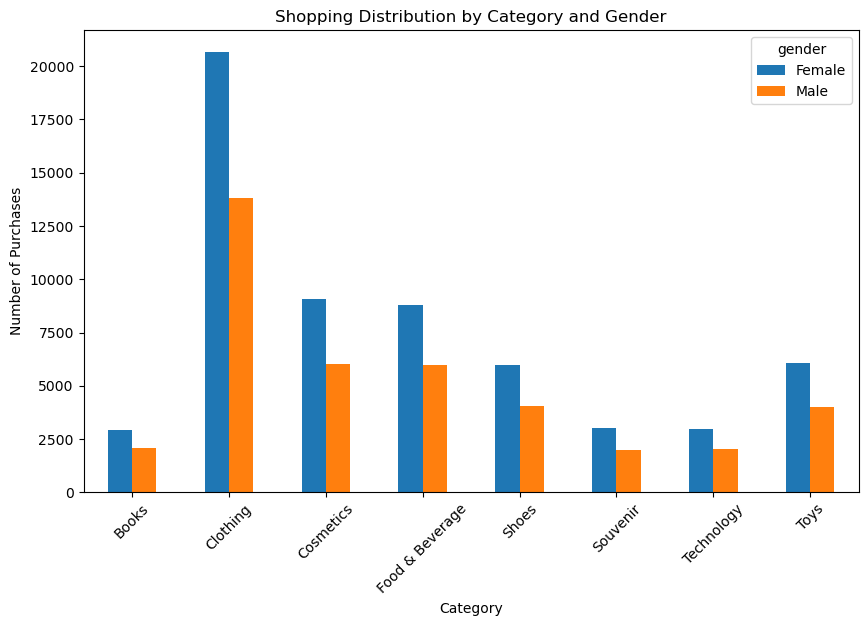

In [61]:
#For Graph

category_gender = df.groupby(['category', 'gender']).size().unstack()

category_gender.plot(kind='bar', figsize=(10,6))
plt.title('Shopping Distribution by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


In [63]:
#For Percentage
crosstab = pd.crosstab(df['category'], df['gender'])
percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
print("\nPERCENTAGE:\n", percent)



PERCENTAGE:
 gender              Female       Male
category                             
Books            58.341698  41.658302
Clothing         59.883434  40.116566
Cosmetics        60.078161  39.921839
Food & Beverage  59.583108  40.416892
Shoes            59.467809  40.532191
Souvenir         60.352070  39.647930
Technology       59.667734  40.332266
Toys             60.325171  39.674829


**REPORT OF ANS-1 : SHOPPING DISTRIBUTION BASED ON CATEGORY AND GENDER CLEARLY SHOWS THAT FEMALE CUSTOMERS ARE MORE ACTIVE SHOPPERS ACROSS MOST CATEGORIES, WITH CLOTHING BEING THE TOP CATEGORY FOR BOTH GENDERS.
CATEGORIES LIKE COSMETICS, FOOD & BEVERAGES, AND TOYS SHOW STRONG FEMALE DOMINANCE, WHILE MALE PURCHASES ARE RELATIVELY Lower AND MORE EVENLY SPREAD ACROSS SMALLER CATEGORIES.**

**Q-2: WHICH GENDER DID WE SELL MORE PRODUCTS TO?**

In [64]:
#For Numbers

df.groupby('gender')['quantity'].sum()


gender
Female    178659
Male      120053
Name: quantity, dtype: int64

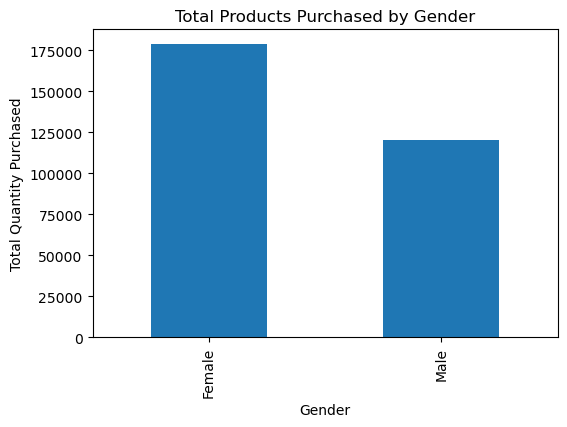

In [65]:
#For Graph

df.groupby('gender')['quantity'].sum().plot(kind='bar', figsize=(6,4))
plt.title("Total Products Purchased by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Quantity Purchased")
plt.show()


**REPORT OF ANS-2 :   WE CAN SEE HERE CLEARLY THAT THE DISTRIBUTED SYSTEM SHOWN IN GRAPH DEPICTS GENDER-FEMALE IS GREATER THAN GENDER-MALE IN EVERY CATEGORY i.e. FEMALES PURCHASED MORE PRODUCTS OVERALL COMPARED TO MALES. WE SOLD MORE PRODUCTS TO FEMALE CUSTOMERS.FEMALE CUSTOMERS PURCHASED A TOTAL OF 178,659 ITEMS, WHICH IS 58,606 MORE THAN MALE CUSTOMERS, WHO PURCHASED 120,053 ITEMS.**

**Q-3: WHICH GENDER GENERATED MORE REVENUE ?**

In [68]:
#For Numbers

df.groupby('gender')['revenue'].sum()



gender
Female    1.502071e+08
Male      1.012987e+08
Name: revenue, dtype: float64

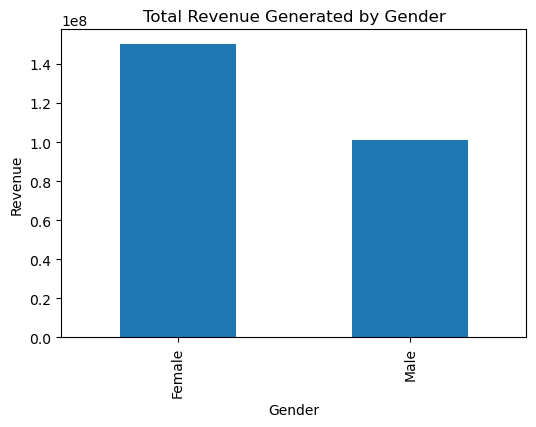

In [69]:
# We already created the revenue column earlier
df.groupby('gender')['revenue'].sum().plot(kind='bar', figsize=(6,4))
plt.title("Total Revenue Generated by Gender")
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.show()



**REPORT OF ANS-03 : ACCORDING TO THE ABOVE GRAPH SHOWN, WE SEE HERE FEMALE CUSTOMERS GENERATED MORE REVENUE THAN MALE CUSTOMERS. 
FEMALE CUSTOMERS contributed a total revenue of 150,207,100, while MALE customers generated 101,298,700.
THIS MEANS FEMALES GENERATED 48,908,400 MORE REVENUE THAN MALES.**

**Q-4 : DISTRIBUTION OF PURCHASE CATEGORIES RELATIVE TO OTHER COLUMNS?** 

In [ ]:
#This means: For each purchase category, we have to show how it relates to Gender, Age, Payment Method, Shopping Mall, Revenue, Quantity

In [ ]:
#4A — Purchase Category vs Gender

In [70]:
#For Numbers

pd.crosstab(df['category'], df['gender'])


gender,Female,Male
category,,
Books,2906,2075
Clothing,20652,13835
Cosmetics,9070,6027
Food & Beverage,8804,5972
Shoes,5967,4067
Souvenir,3017,1982
Technology,2981,2015
Toys,6085,4002


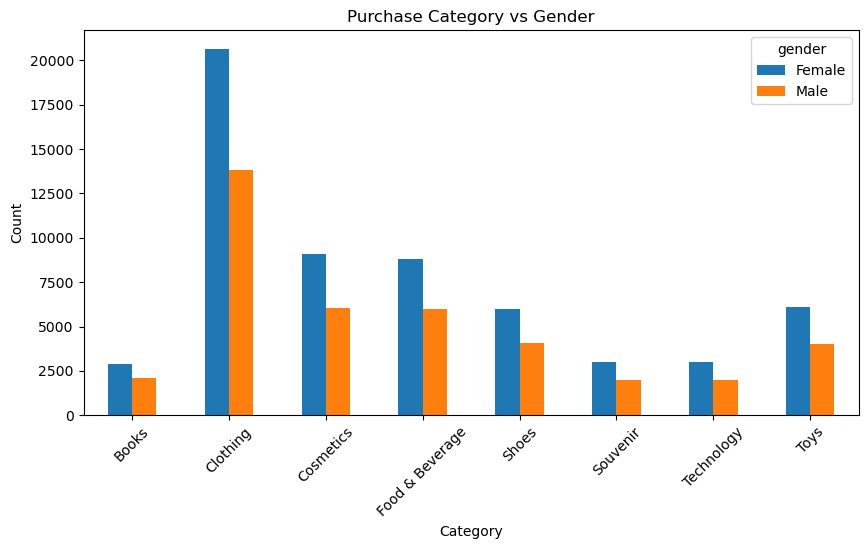

In [71]:
#For Graph

pd.crosstab(df['category'], df['gender']).plot(kind='bar', figsize=(10,5))
plt.title("Purchase Category vs Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#4b- Purchase Category vs age

In [73]:
#Creating age group
df['age_group'] = pd.cut(
    df['age'],
    bins=[0,18,25,35,45,60,120],
    labels=['0-18','19-25','26-35','36-45','46-60','60+']
)


In [74]:
#For Numbers
pd.crosstab(df['category'], df['age_group'])



age_group,0-18,19-25,26-35,36-45,46-60,60+
category,,,,,,
Books,106,682,920,940,1469,864
Clothing,646,4691,6614,6711,9901,5924
Cosmetics,267,2009,2895,2906,4407,2613
Food & Beverage,281,2025,2820,2942,4158,2550
Shoes,171,1379,1928,1926,2878,1752
Souvenir,108,660,970,999,1411,851
Technology,89,662,962,1040,1393,850
Toys,176,1407,1950,1972,2817,1765


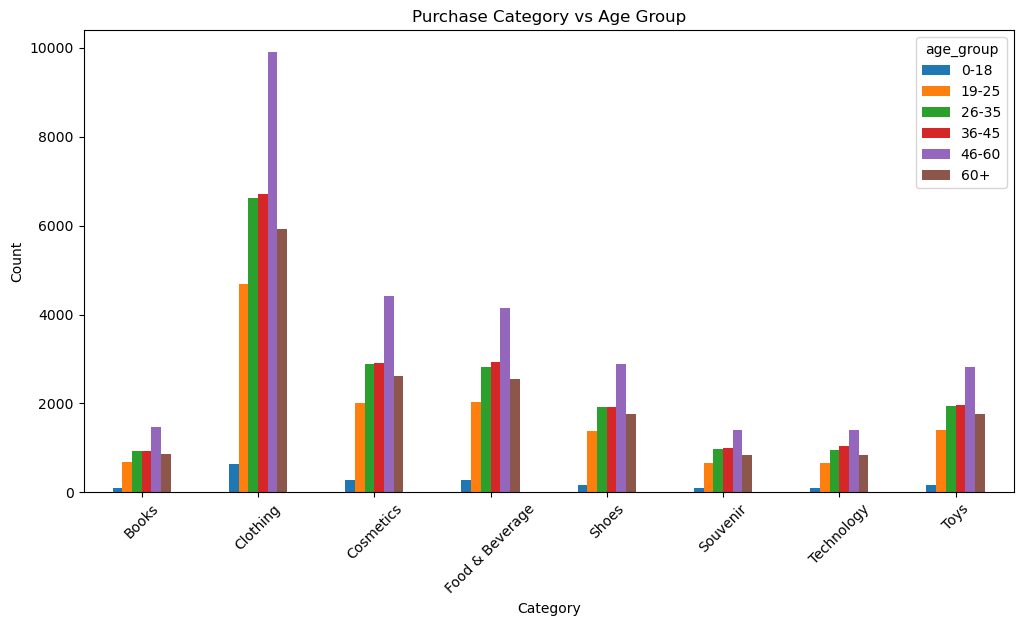

In [75]:
#For Graph

pd.crosstab(df['category'], df['age_group']).plot(kind='bar', figsize=(12,6))
plt.title("Purchase Category vs Age Group")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#4C — Purchase Category vs Payment Method

In [76]:
#For Numbers

pd.crosstab(df['category'], df['payment_method'])


payment_method,Cash,Credit Card,Debit Card
category,,,
Books,2268,1696,1017
Clothing,15456,12025,7006
Cosmetics,6674,5336,3087
Food & Beverage,6587,5250,2939
Shoes,4474,3553,2007
Souvenir,2211,1770,1018
Technology,2235,1753,1008
Toys,4542,3548,1997


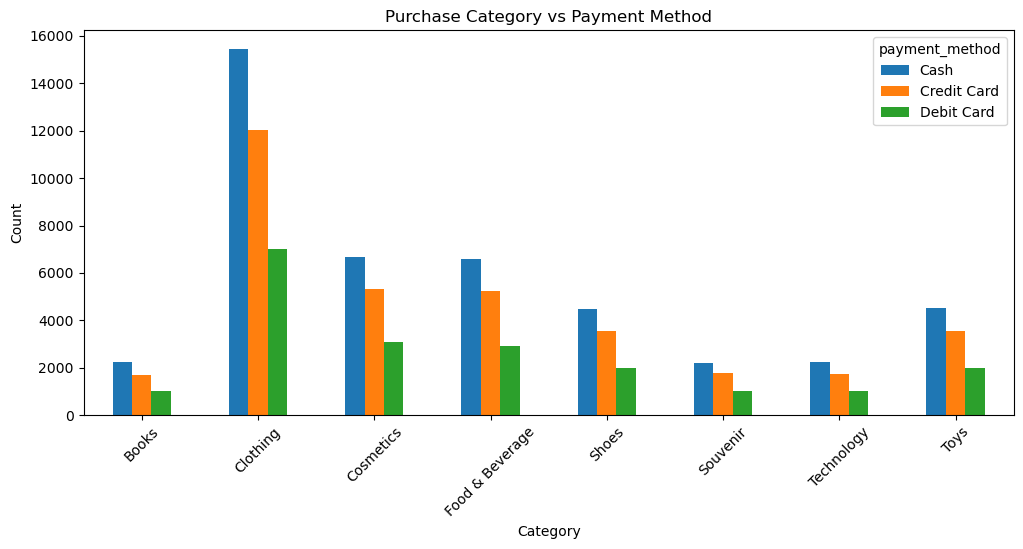

In [77]:
#For Graph

pd.crosstab(df['category'], df['payment_method']).plot(kind='bar', figsize=(12,5))
plt.title("Purchase Category vs Payment Method")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#4D — Purchase Category vs Shopping Mall

In [78]:
#For Numbers

pd.crosstab(df['category'], df['shopping_mall'])


shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
category,,,,,,,,,,
Books,258,236,252,462,1013,1025,752,476,246,261
Clothing,1729,1651,1729,3353,6840,6923,5268,3525,1708,1761
Cosmetics,732,760,770,1458,3023,3050,2265,1541,734,764
Food & Beverage,772,692,712,1490,2909,2957,2244,1517,733,750
Shoes,490,498,458,1001,2017,2023,1457,1074,497,519
Souvenir,240,247,261,515,1037,948,738,531,225,257
Technology,256,263,234,487,997,1017,772,464,256,250
Toys,514,464,531,1015,1987,2000,1515,1033,515,513


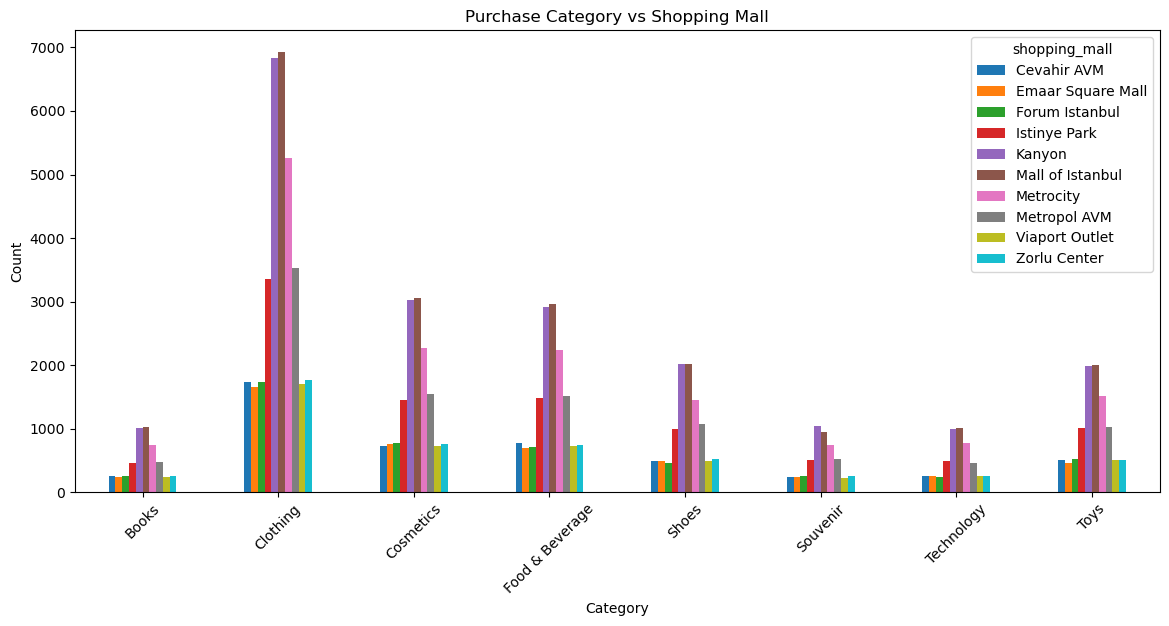

In [82]:
#For Graph

pd.crosstab(df['category'], df['shopping_mall']).plot(kind='bar', figsize=(14,6))
plt.title("Purchase Category vs Shopping Mall")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [4]:
#4E — Average Revenue per Category

In [80]:
#For Numbers

df.groupby('category')['revenue'].mean()


category
Books                167.547260
Clothing            3305.500364
Cosmetics            449.947864
Food & Beverage       57.494251
Shoes               6632.793649
Souvenir             127.190368
Technology         11581.735388
Toys                 394.609521
Name: revenue, dtype: float64

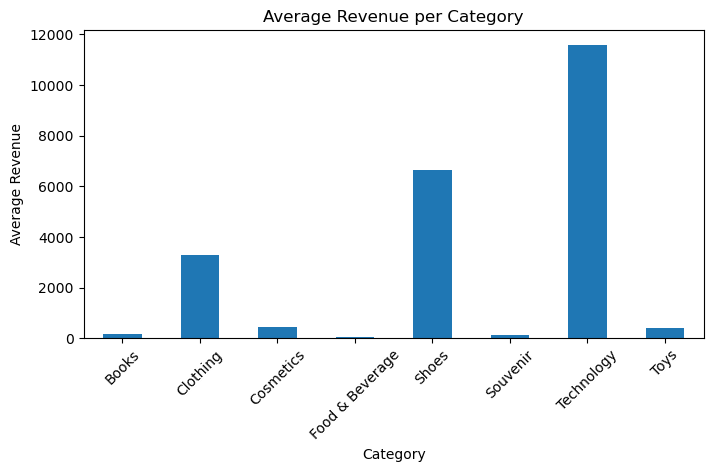

In [83]:
#For Graph

df.groupby('category')['revenue'].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Revenue per Category")
plt.xlabel("Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()



In [6]:
#4F — Total Quantity Sold by Category

In [81]:
#For Numbers

df.groupby('category')['quantity'].sum()


category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

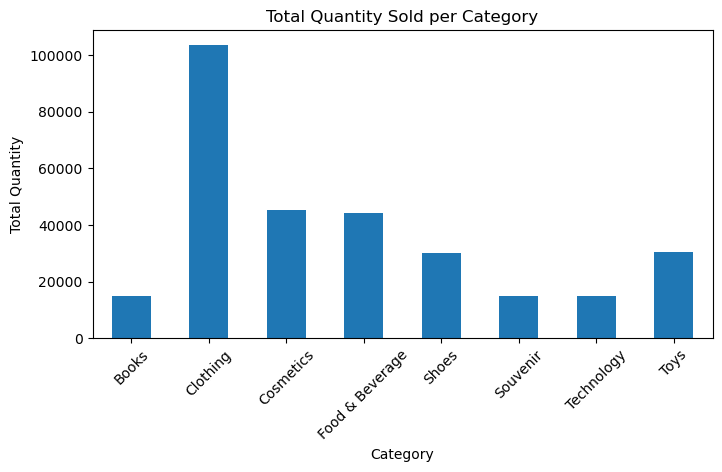

In [84]:
#For Graph

df.groupby('category')['quantity'].sum().plot(kind='bar', figsize=(8,4))
plt.title("Total Quantity Sold per Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()



**REPORT OF ANSWER 4**

**4A-
IN PURCHASE CATEGORY VS GENDER , COTHING BEING THE MOST PURCHASED ONE & FEMALES DOMINATE HERE CLEARLY IN EVERY CATEGORY.** 



**4B-
IN PURCHASE CATEGORY VS AGE GROUP , AGE(46-60) CLEARLY HAS EDGE OVER OTHER AGE GROUPS. THEY ARE POPULAR AMONG CLOTHING,COSMETICS & BEVERAGES WHEREAS BOOKS, SOUVENIR & TECHNOLOGY ARE LESS POPULAR AMONG THEM. AGE (26-35)&(36-45) ARE ACTIVE IN ALMOST ALL CATEGORIES WITH CLOTHING BEING MOST AND BOOKS,SOUVENIR & TECHNOLOGY BEING LEAST PURCHASED.
AGE(0-18) HAS MINIMUM INTEREST IN PURCHASING ANYTHING; EVEN PURCHASING TOYS ARE NOWHERE NEAR TO OTHER AGE GROUPS**

**4C-
IN PURCHASE CATEGORY VS PAYMENT METHOD , CASH BEING MOST USED PAYMENT METHOD FOLLOWING BY CREDIT AND DEBIT CARD**

**4D-
IN PURCHASE CATEGORY VS SHOPPING MALL, FOR CLOTHING, 'Mall of Istanbul' AND' Kanyon' ARE MOST VISITED ONES WITH SLIGHLY EDGE TO 'Mall of Istanbul'.
ON THE OTHER HAND 'Emaar Square Mall','Cevahir AVM' and 'Zorlu Center' ARE AMONG THE LEAST VISTED MALLS FOR SHOPING**

**4E-
IN AVERAGE REVENUE PER CATEGORY , TECHNOLOGY BEING THE HIGHEST AVERAGE SOURCE FOR REVENUE PER CATEGORY AND IT DWARFS 'Food & Beverages' AND 'Souvenir' BY UNIMAGINABLE MARGINS. 'Food & Beverages' HAS GENERATED HERE THE MINIMUM AVERAGE REVENUE**

**4F-
IN TOTAL QUANTITY SOLD PER CATEGORY,COTHING SECTION HAS BEEN MOST SOLD IN TOTAL NUMBERS , APPROX-(100000) WITH COSMETICS AND FOOD & BEVERAGES ARE SECOND MOST THAT HAVE BEEN SOLD , APPROX- (42000-43000). THE LEAST SOLD ARE BOOKS , SOUVENIR AND TECHNOLOGY AS USUAL**

**Q-5 : HOW IS THE SHOPPING DISTRIBUTION ACCORDING TO AGE**

In [85]:
#Distribution count of each age-group
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 25, 35, 45, 60, 120],
    labels=['0-18','19-25','26-35','36-45','46-60','60+']
)


In [86]:
#For exact numbers
df['age_group'].value_counts().sort_index()

age_group
0-18      1844
19-25    13515
26-35    19059
36-45    19436
46-60    28434
60+      17169
Name: count, dtype: int64

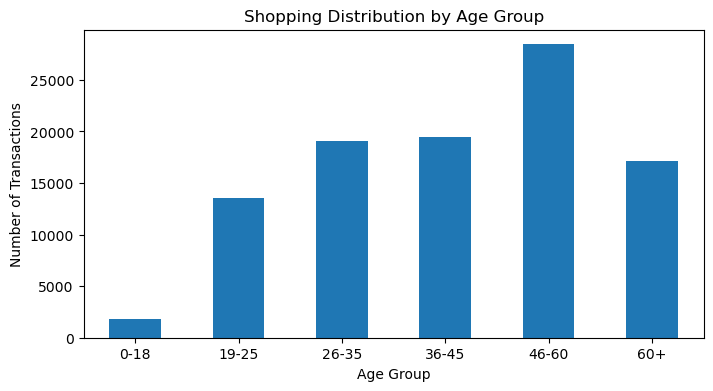

In [87]:
#For bar-chart
df['age_group'].value_counts().sort_index().plot(
    kind='bar', figsize=(8,4)
)


plt.title("Shopping Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()


**REPORT OF ANS-5 : IN THIS , (46-60) AGE GROUP SHOWS THE HIGHEST NUMBER OF SHOPPING TRANSACTIONS. THAT MEANS IN THIS AGE GROUP THEY ARE MOST INCLINED TOWARDS SHOPPING WITH TOTAL 28434 IN NUMBER. HEREAFTER, THERE IS A SHARP DECLINE AFTER AGE 60 WITH TOTAL 17169**

**Q-6 : WHICH AGE CATEGORY DID WE SELL MORE PRODUCTS TO ?**

In [88]:
#Here, “sell more products” means: Total quantity purchased by each age group.

#We are not counting the number of invoices — we are summing quantity.

In [89]:
#For numbers in counting
df.groupby('age_group')['quantity'].sum()


C:\Users\jhaki\AppData\Local\Temp\ipykernel_24592\3370092234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['quantity'].sum()


age_group
0-18      5518
19-25    40510
26-35    57265
36-45    58483
46-60    85399
60+      51537
Name: quantity, dtype: int64

C:\Users\jhaki\AppData\Local\Temp\ipykernel_24592\635297048.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['quantity'].sum().plot(


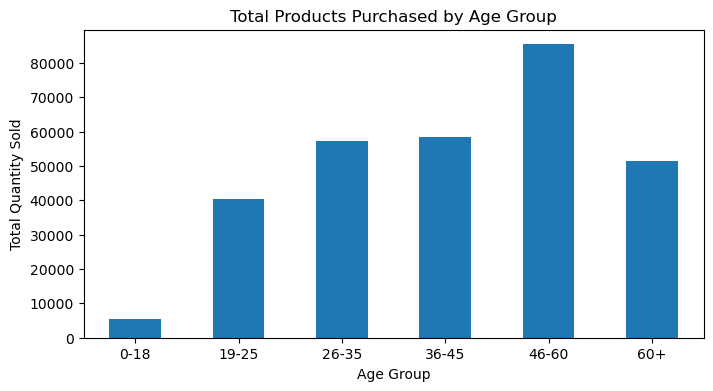

In [90]:
#For bar - chart

df.groupby('age_group')['quantity'].sum().plot(
    kind='bar', figsize=(8,4)
)
plt.title("Total Products Purchased by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=0)
plt.show()


**REPORT OF ANS-6 : THE 46–60 AGE RANGE IS THE MOST VALUABLE CUSTOMER GROUP IN TERMS OF TOTAL PRODUCT QUANTITY, INDICATING HIGH PURCHASING POWER AND STRONG SHOPPING ACTIVITY AMONG MIDDLE-AGED CUSTOMERS.**

**Q-7 : WHCIH AGE CATEGORY GENERATED MORE REVENUE ?**

In [91]:
#For numbers in counting
df.groupby('age_group')['revenue'].sum()


C:\Users\jhaki\AppData\Local\Temp\ipykernel_24592\948518827.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['revenue'].sum()


age_group
0-18      4397720.26
19-25    33720551.09
26-35    47879659.58
36-45    50184235.79
46-60    71804157.87
60+      43519469.66
Name: revenue, dtype: float64

C:\Users\jhaki\AppData\Local\Temp\ipykernel_24592\2051669100.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['revenue'].sum().plot(


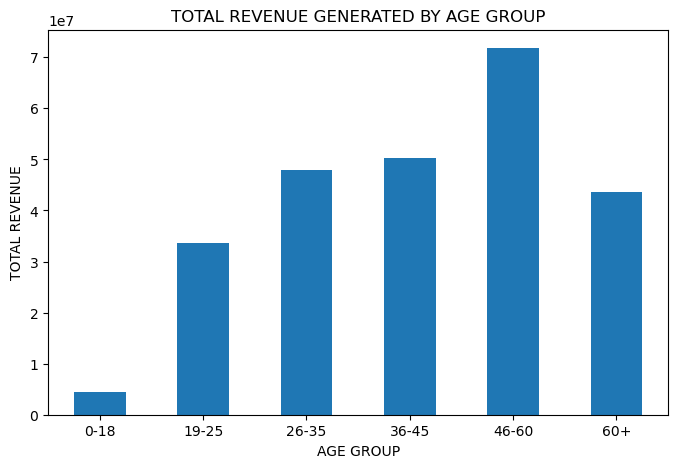

In [92]:
#For bar - chart

df.groupby('age_group')['revenue'].sum().plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("TOTAL REVENUE GENERATED BY AGE GROUP")
plt.xlabel("AGE GROUP")
plt.ylabel("TOTAL REVENUE")
plt.xticks(rotation=0)
plt.show()


**REPORT OF ANS-7 :THE 46–60 AGE SEGMENT IS THE MOST PROFITABLE AGE GROUP, GENERATING THE MAXIMUM REVENUE AMONG ALL AGE CATEGORIES. THIS SHOWS THAT MIDDLE-AGED CUSTOMERS HAVE THE HIGHEST PURCHASING POWER AND ARE THE MOST VALUABLE GROUP FOR BUSINESS GROWTH.
THE AGE RANGE 36–60 ACCOUNTS FOR THE MAJORITY OF TOTAL REVENUE, MAKING IT THE PRIMARY TARGET FOR HIGH-VALUE SALES STRATEGIES**

**Q-8 : DISTRIBUTION OF PURCHASE CATEGORIES RELATIVE TO OTHER COLUMNS**

**SAME QUESTION REPEATED AS IN Q-4 . ANSWER ALREADY GIVEN**

**Q-9 : DOES THE PAYMENT METHOD HAVE A RELATION WITH OTHER COLUMNS?**

In [93]:
#PAYMENT METHOD VS GENDER (numbers)

pd.crosstab(df['payment_method'], df['gender'])


gender,Female,Male
payment_method,,
Cash,26509,17938
Credit Card,21011,13920
Debit Card,11962,8117


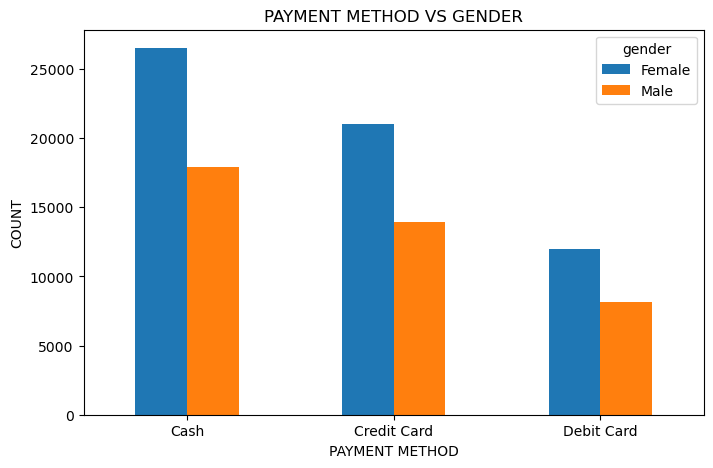

In [94]:
#PAYMENT METHOD VS GENDER (Graph)

pd.crosstab(df['payment_method'], df['gender']).plot(
    kind='bar',
    figsize=(8,5)
)
plt.title("PAYMENT METHOD VS GENDER")
plt.xlabel("PAYMENT METHOD")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.show()


In [95]:
#PAYMENT METHOD VS AGE GROUP (Numbers)

pd.crosstab(df['payment_method'], df['age_group'])


age_group,0-18,19-25,26-35,36-45,46-60,60+
payment_method,,,,,,
Cash,815,6023,8523,8679,12642,7765
Credit Card,650,4772,6653,6832,9979,6045
Debit Card,379,2720,3883,3925,5813,3359


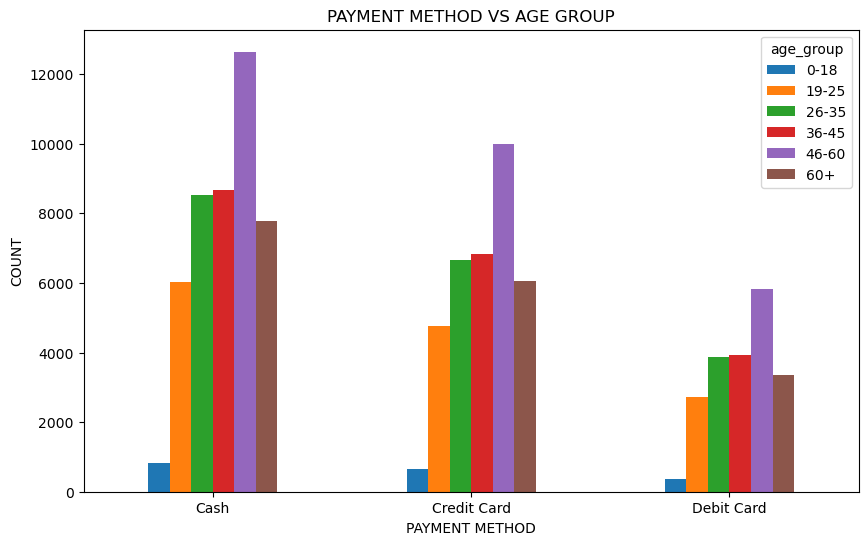

In [96]:
#PAYMENT METHOD VS AGE GROUP (Graph)

pd.crosstab(df['payment_method'], df['age_group']).plot(
    kind='bar',
    figsize=(10,6)
)
plt.title("PAYMENT METHOD VS AGE GROUP")
plt.xlabel("PAYMENT METHOD")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.show()


In [97]:
#PAYMENT METHOD VS CATEGORY (Numbers)

pd.crosstab(df['payment_method'], df['category'])


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
payment_method,,,,,,,,
Cash,2268,15456,6674,6587,4474,2211,2235,4542
Credit Card,1696,12025,5336,5250,3553,1770,1753,3548
Debit Card,1017,7006,3087,2939,2007,1018,1008,1997


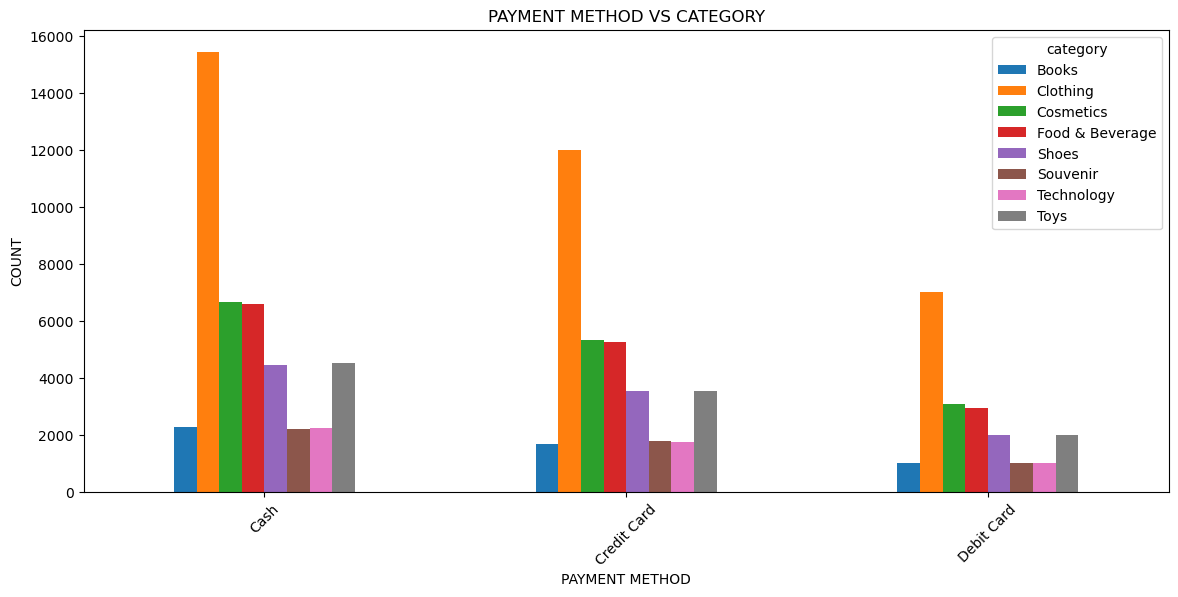

In [98]:
#PAYMENT METHOD VS CATEGORY (Graph)

pd.crosstab(df['payment_method'], df['category']).plot(
    kind='bar',
    figsize=(14,6)
)
plt.title("PAYMENT METHOD VS CATEGORY")
plt.xlabel("PAYMENT METHOD")
plt.ylabel("COUNT")
plt.xticks(rotation=45)
plt.show()


In [99]:
#PAYMENT METHOD VS SHOPPING MALL (Numbers)

pd.crosstab(df['payment_method'], df['shopping_mall'])


shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
payment_method,,,,,,,,,,
Cash,2228,2114,2183,4436,8853,8894,6625,4559,2231,2324
Credit Card,1779,1696,1750,3422,6916,7019,5347,3521,1721,1760
Debit Card,984,1001,1014,1923,4054,4030,3039,2081,962,991


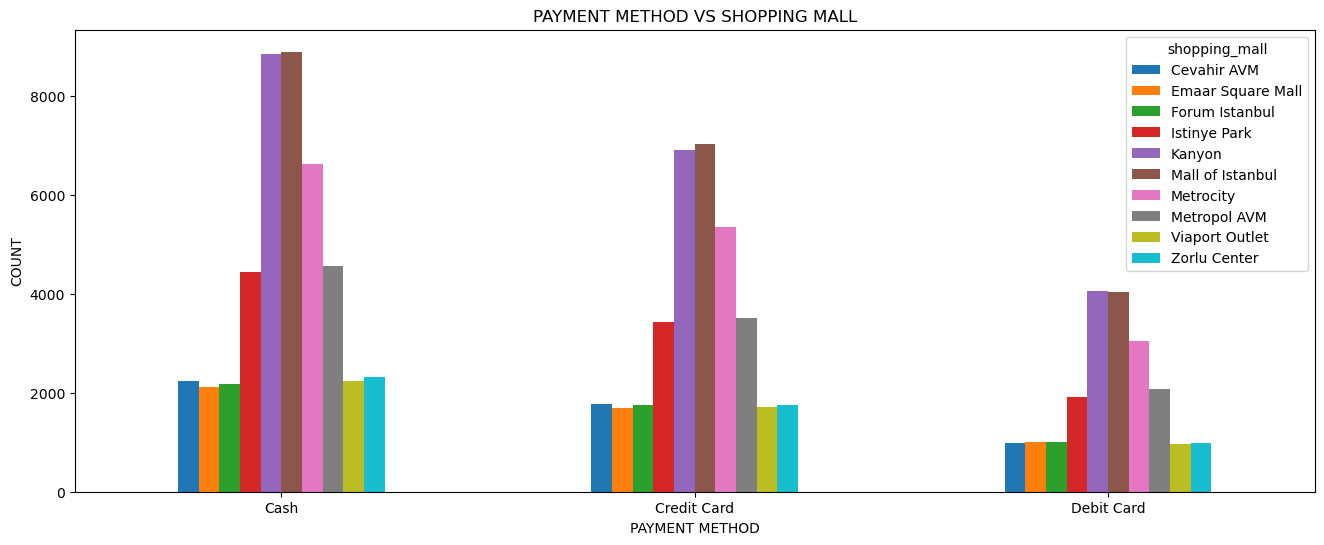

In [100]:
#PAYMENT METHOD VS SHOPPING MALL (Graph)

pd.crosstab(df['payment_method'], df['shopping_mall']).plot(
    kind='bar',
    figsize=(16,6)
)
plt.title("PAYMENT METHOD VS SHOPPING MALL")
plt.xlabel("PAYMENT METHOD")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.show()


**REPORT OF ANS-9 :**

**FEMALE CUSTOMERS USE ALL PAYMENT METHODS (CASH, CREDIT CARD, DEBIT CARD) MORE FREQUENTLY THAN MALE CUSTOMERS.
THIS SHOWS THAT FEMALES ARE MORE FINANCIALLY ACTIVE IN SHOPPING BEHAVIOR AND ENGAGE MORE IN BOTH CASH AND CARD TRANSACTIONS.**

**THE PAYMENT METHOD CLEARLY RELATES TO AGE.
THE AGE GROUPS 26–60 DOMINATE ALL PAYMENT METHODS — CASH, CREDIT CARD, AND DEBIT CARD.
CASH REMAINS THE MOST USED PAYMENT METHOD, BUT CREDIT CARD AND DEBIT CARD USAGE ARE HIGH AMONG MATURE CUSTOMER GROUPS.
THE 46–60 AGE GROUP IS THE STRONGEST USER ACROSS ALL PAYMENT TYPES, INDICATING THE HIGHEST FINANCIAL ACTIVITY.
THE 0–18 AGE GROUP HAS THE LOWEST USAGE OF ALL PAYMENT METHODS DUE TO LIMITED BUYING POWER.**

**CASH IS THE MOST USED PAYMENT METHOD ACROSS ALL CATEGORIES, MAKING IT THE PRIMARY MODE OF TRANSACTION.
CREDIT CARDS ARE STRONGLY ASSOCIATED WITH PREMIUM AND MEDIUM-VALUE CATEGORIES SUCH AS CLOTHING, COSMETICS, SHOES, AND TECHNOLOGY.
DEBIT CARDS SHOW MODERATE USAGE, MAINLY FOR CLOTHING AND OTHER MID-RANGE CATEGORIES.
OVERALL, THE DATA SHOWS THAT PAYMENT PREFERENCE DEPENDS ON CATEGORY VALUE AND PURCHASE TYPE, WITH CASH DOMINATING FREQUENT, LOW-VALUE TRANSACTIONS AND CREDIT CARDS BEING USED FOR HIGHER-VALUE SHOPPING.**

**THE PAYMENT METHOD IS CLEARLY RELATED TO THE SHOPPING MALL.
HIGH-TRAFFIC AND PREMIUM MALLS SUCH AS MALL OF ISTANBUL, KANYON, METROCITY, AND ISTINYE PARK SHOW THE HIGHEST LEVELS OF CASH, CREDIT CARD, AND DEBIT CARD USAGE.
THIS INDICATES GREATER CUSTOMER ACTIVITY AND HIGHER-PURCHASE BEHAVIOR IN THESE MALLS.
OUTLET MALLS AND MID-RANGE MALLS SHOW LOWER CARD USAGE BUT CONSISTENT CASH USAGE, CONFIRMING THAT CASH REMAINS THE MOST COMMON PAYMENT CHOICE ACROSS ALL MALL**

**Q-10 : HOW IS THE DISTRIBUTION OF OF THE PAYMENT METHOD ?**

In [101]:
#For Numbers

df['payment_method'].value_counts()


payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

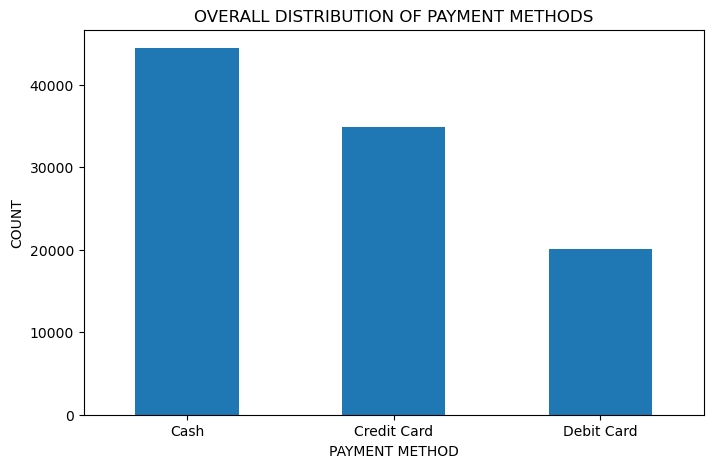

In [102]:
#For Graph

df['payment_method'].value_counts().plot(
    kind='bar',
    figsize=(8,5)
)
plt.title("OVERALL DISTRIBUTION OF PAYMENT METHODS")
plt.xlabel("PAYMENT METHOD")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.show()


**REPORT OF ANS-10 :**
**THE DATA SHOWS THAT CASH IS USED THE MOST, INDICATING THAT MANY PURCHASES ARE LOW-VALUE, FREQUENT, OR IMPULSE-BASED.
CREDIT CARD USAGE IS ALSO VERY HIGH, SHOWING SIGNIFICANT CARD-BASED SHOPPING BEHAVIOR, ESPECIALLY FOR PREMIUM CATEGORIES.
DEBIT CARD USAGE IS THE LOWEST, BUT STILL CONSISTENTLY USED BY A LARGE NUMBER OF CUSTOMERS.
OVERALL, PAYMENT BEHAVIOR INDICATES A STRONG MIX OF TRADITIONAL CASH USERS AND MODERN CARD USERS, WITH CASH STILL DOMINATING TRANSACTIONS.**

**Q-11 : VISUALIZE THE DATA USING TABLEAU/POWER BI AND DERIVE INSIGHTS AND GIVE YOUR INPUTS/SUGGESTIONS TO THE COMPANY.**